# Task 1: *Identify Transcription Binding Sites in ACE2*
*Computationally predict the genomic locations of transcription-factor binding sites around the ACE2 gene.*  
**Option 1.** Use ChIP-seq datasets.  
**Option 2.** Use ENCODE data.  
**Option 3.** Use UCSC, Ensembl, [ReMap](http://remap.univ-amu.fr/), and other integrative analysis tools.
### Terminology:  
**Topologically Associating Domais (TADs):** Self-interacting genomic regions within which enhancer-promoter interactiond are restricted to. TAD locations are defined by applying an algorithm to Hi-C data.  
**CTCF:** Transcriptional repressor CTCF, 11-zinc finger protein, or CCCTC-binding factor is a transcription factor encoded by the CTCF gene. CTCF binding to the consensus sequence CCGCGNGGNGGCAG affects transcriptional regulation, insulation, chromatin architecture, and RNA splicing.  
**Trancription-Factor Binding Sites (TFBSs):** Usually short, around 5-15 base-pairs (bps).  
**ChiP-seq:** Chromatin-immunoprecipitation followed by sequencing, a technique that identifies binding sites across many cell types for different transcriptional regulators (TRs).   
**Transcriptional Regulators (TRs):** Transcription factors (TFs), transcriptional coactivators (TCAs), and chromatin-remodeling factors (CRFs). Transcription factors (TFs) are proteins that bind to DNA and interact with RNA polymerases to regulate gene expression. Some TFs contain a DNA binding domain and can bind directly to specific short DNA sequences ('motifs'); others bind to DNA indirectly through interactions with TFs containing a DNA binding domain. High-throughput antibody capture and sequencing methods (e.g. ChIP-seq) can be used to identify regions of TF binding genome-wide, or "ChIP-seq peaks."

# UCSC Genome Browser:
## Relevant Tracks:
1. Integrated Regulation from ENCODE Tracks: 
    - The ***Transcription*** track shows transcription levels assayed by sequencing of polyadenylated RNA from a variety of cell types.  
    - The ***Layered H3K4Me1*** and ***Layered H3K27Ac*** tracks show where modification of histone proteins is suggestive of enhancer and, to a lesser extent, other regulatory activity.  
    - The ***DNase I Hypersensitivity*** tracks indicate where chromatin is hypersensitive to cutting by the DNase enzyme, which has been assayed in a large number of cell types. Regulatory regions, in general, tend to be DNase-sensitive, and promoters are particularly DNase-sensitive.  
    - The ***Txn Factor ChIP*** tracks show DNA regions where transcription factors, proteins responsible for modulating gene transcription, bind as assayed by chromatin immunoprecipitation with antibodies specific to the transcription factor followed by sequencing of the precipitated DNA (ChIP-seq).   
2. ENCODE Transcription Factor Binding Tracks  
3. Comparison of Micro-C and In situ Hi-C protocols in H1-hESC and HFFc6  


# Determining TAD Boundaries: 
1. **A Compendium of Chromatin Contact Maps Reveals Spatially Active Regions in the Human Genome** - [Study accession: SRP090175](https://www.cell.com/cell-reports/pdfExtended/S2211-1247(16)31481-4) - *Cataloged 3D genome interactions at various hierarchical levels, revealing local interaction hotspots (TADs) for different tissue samples.*  
2. [BEDTools](https://eagle.fish.washington.edu/cnidarian/LabNotebook_html080113.enex/BedTools%20Manual.resources/BEDTools-User-Manual.pdf)  

### Outline:
1. Create custom tracks on UCSC Genome Browser for the TAD data from the study SRP090175 (***TAD-tissues.tgz***)  
    a. File format includes required BED fields (**chrom**, **chromStart**, and **chromEnd**), as well as and additional **hierarchical score** field that indicates sub-TADs   
2. Label tracks according to sample tissue and sex  
3. Set tracks to "pack" in order to visualize sub-TADs  
4. Isolate ACE2-spanning TADs, ± 50kb  
5. Use the UCSC Table Browser to predict TFBSs in the desired region  

### Step-By-Step Walkthrough:
1. In UCSC Genome Browser:  
    a. Set all custom TAD tracks to "pack."  
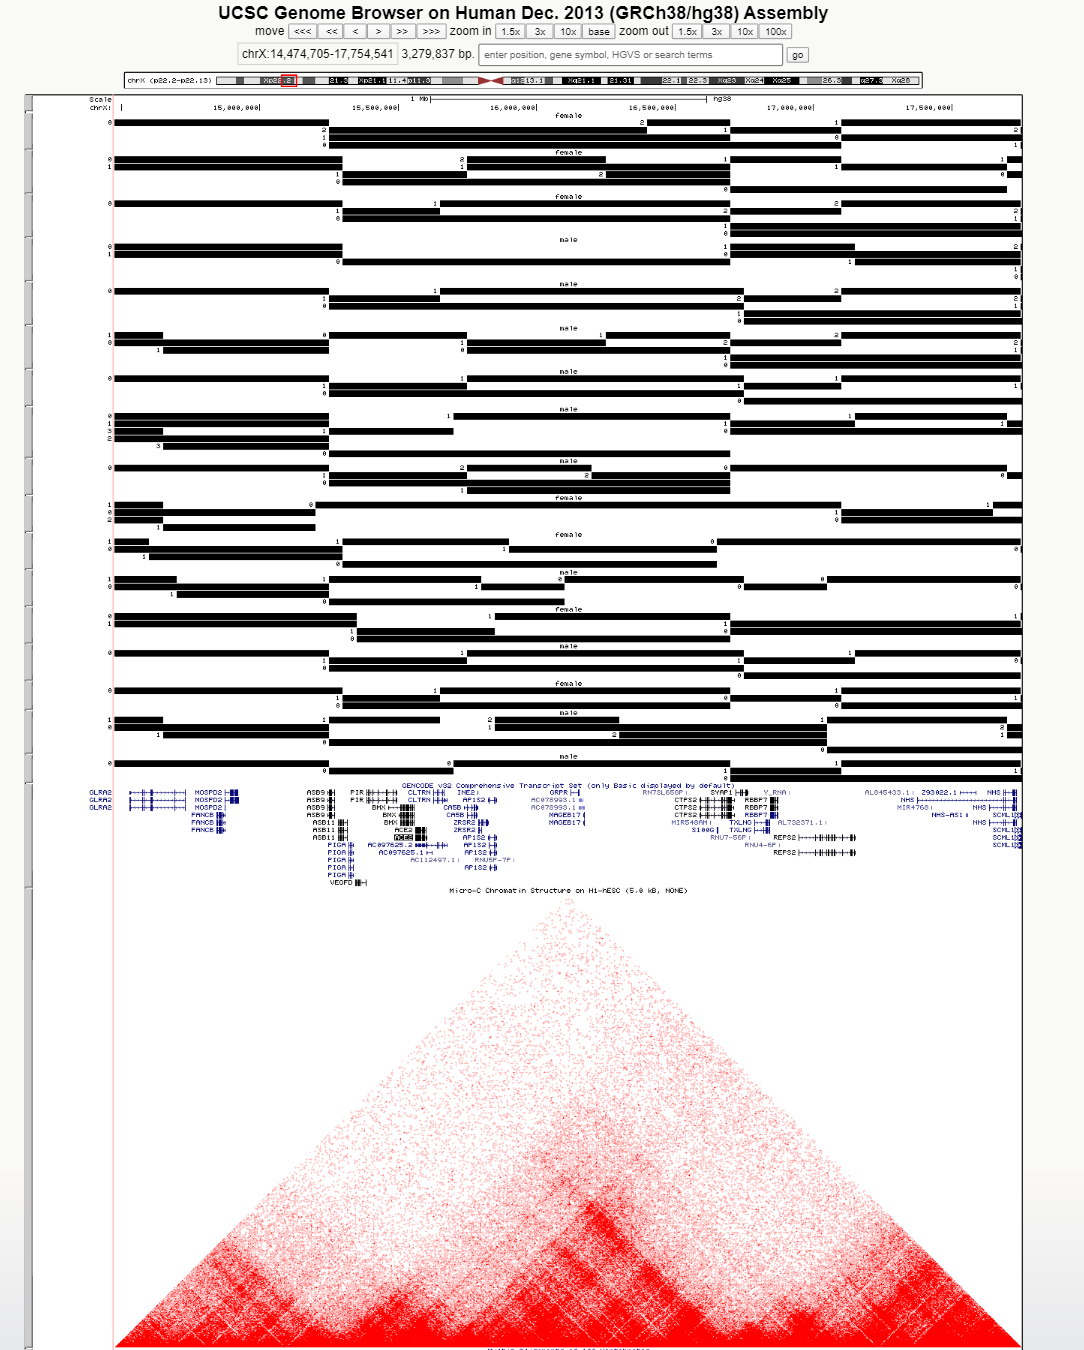    
    b. Select the common ACE2-containing region of overlap between all tracks.  
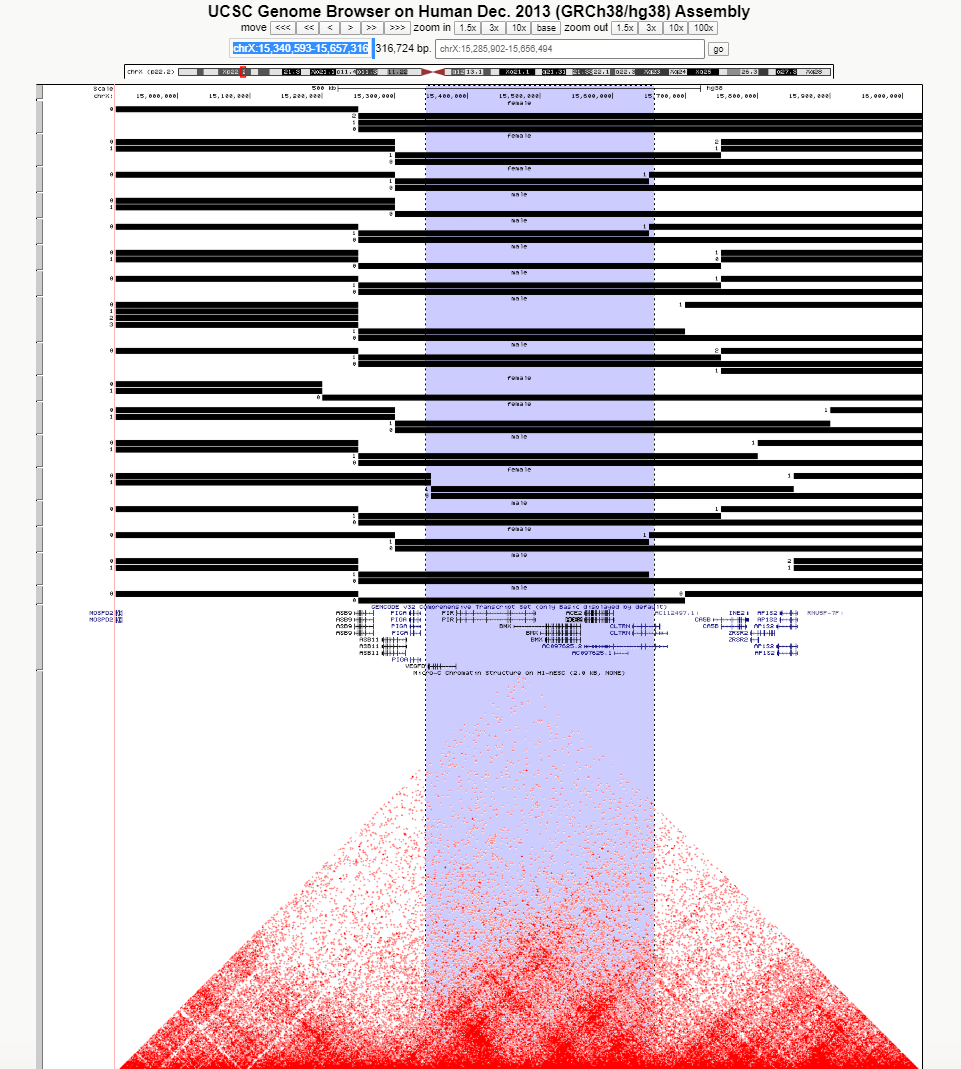  
    c. Obtain the genomic coordinates of the selected region, ± 50kb. In this case, chrX:15,349,591-15,650,487 **± 50kb** (chrX:15,299,591-15,700,487).    

2. In UCSC Table Browser:  
    a. clade: **Mammal**  
    b. genome: **Human**  
    c. assembly: **GRCh38/gh38**  
    d: group: **Regulation**  
    e. track: **TF Clusters**  
    f. table: **encRegTfbsClustered**  
    g. region: **chrX:15,299,591-15,700,487**  
    h. filter: *For this example, a filter was applied for the tanscriptional repressor **CTCF**.*  
    i. output: **BED - browser extensible data**   
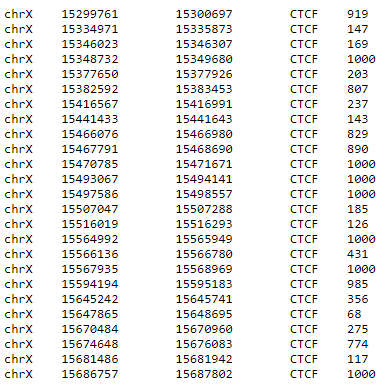  

*The output file indicates the genomic position and associated score for the predicted TFBS.*  

# Further Investigation:
### Sex-Based Differences in TFBSs for CTCF:  
- Repeat the procedure outlined above twice, once for female samples and once for male samples, separately.  

**Female:** chrX:15,349,591-15,650,487 ± 50kb (chrX:15,299,591-15,700,487)    
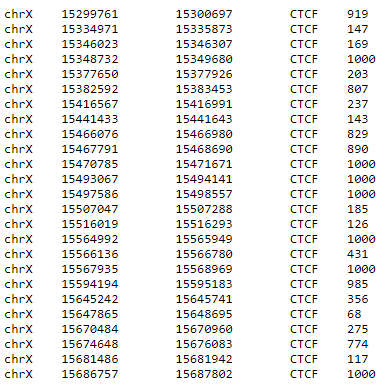    

**Male:** chrX:15,299,016-15,651,574 ± 50kb (chrX:15,249,016-15,701,574)  
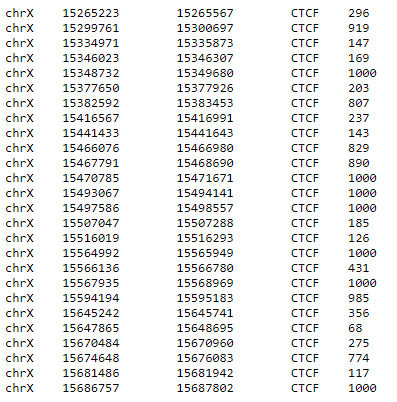    
- Create an intersection between female and male samples using UCSC Table Broswer's [**intersection**](https://genome.ucsc.edu/goldenPath/help/hgTablesHelp.html#IntersectionOptions) functionality. *In this case, the TFBSs that are unique to either sex were identified by selecting the records that have **no overlap** between the two tables.*  
**Unique to female:** There are no TFBSs for CTCF that are unique to females.  
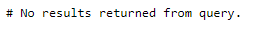  
**Unique to male:** There is one TFBS for CTCF that is unique to males.  
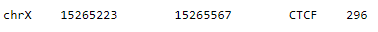    

### Sex-Based Differences in TFBSs for Multiple Regulatory Elements:  
- Repeat the procedure outlined above without the filter for CTCF.  
**Unique to female:** There are no TFBSs that are unique to females.  
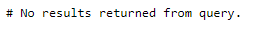  
**Unique to male:** There are various TFBS that are unique to males.  
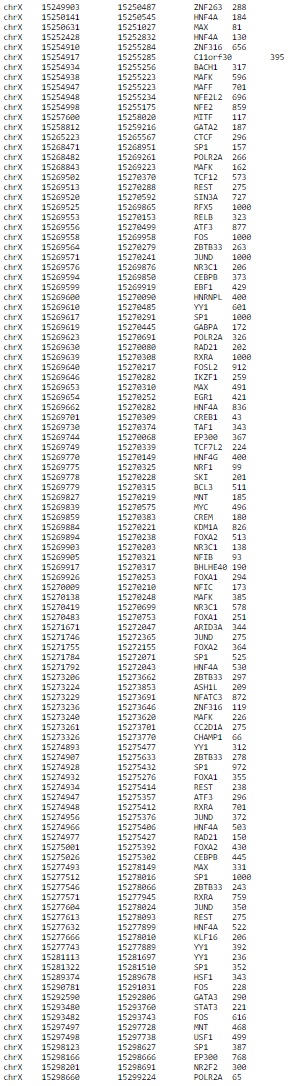  

# Preliminary Investigation Into Cis-Regulatory Mechanisms of Sex-Biased Differentially Expressed Genes
1. [Regulatory and evolutionary signatures of sex-biased genes on both the X chromosome and the autosomes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5668987/)
> In terms of gene regulation, many epigenetic marks can be used to study the gene regulation of sexually dimorphic gene expression. **Chromatin accessibility** refers to the eviction of nucleosome, allowing transcription factors to bind, and regions of chromatin accessibility are regarded as regions that contain important regulatory elements such as *promoters* and *enhancers*. Promoters and enhancers are further marked by the presence of specific **histone modifications**, such as *H3K4me3*. In addition, **replication timing** refers to the order in which segments of DNA are replicated and have been found to be correlated with level of transcription and evolutionary conservation.
>
> **Topologically associating domains (TADs)** not only delineate the 3D boundaries of transcription but also correspond to boundaries of replication timing domains. On the human X chromosomes, escape genes tend to be clustered in TADs.
>
2. [A transcription regulatory network within the ACE2 locus may promote a pro-viral
2 environment for SARS-CoV-2 by modulating expression of host factors.](https://www.biorxiv.org/content/10.1101/2020.04.14.042002v1.full.pdf)
> Regulatory elements within ACE2 that control the expression of **PIR**, **CA5B**, and **VSP13C** in the lung.
> ACE2 is an X-linked gene whose expression is regulated by chromatin structure. **Brg1**, a chromatin remodeler, and the **FoxM1** transcription factor recognize the ACE2 promoter and reduce expression through a mechanism involving structural chromatin changes.
> There are common genetic variants (SNPs) located within the ACE2 locus form spatial cis-acting regulatory interactions with PIR, CA5BP1, and CA5B across sub-TAD boundaries on **chrX:15,300,000-15,600,000**. Inter-TAD trans-acting interactions regulate PHKA2 (3.2 Mb away) and VPS13C (located on chromosome 15).

# Preliminary Investigation into Tissue and Sex-Based Differences:
## Lung Sample Analysis from SRP090175
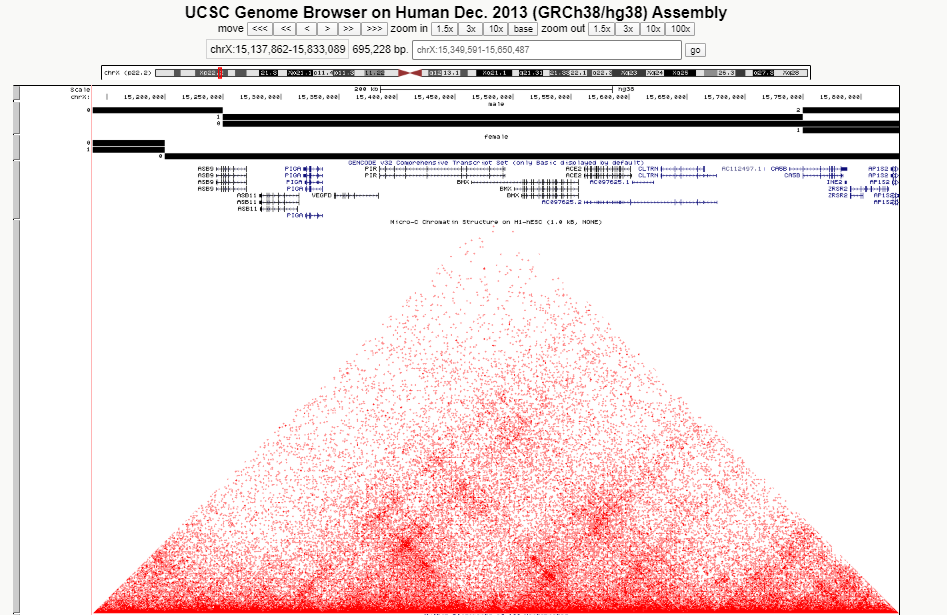    
**Female TAD:** chrX:15,192,675-17,110,730 ± 50kb (chrX:15,142,675-17,160,730)  
**Male TAD:** chrX:15,247,649-15,752,128 ± 50kb (chrX:15,197,649-15,802,128)  
- Sex-differential TADs are observed in lung tissue. The female TAD spanning ACE2 is much longer in females than in males.  

### Results from intersection:
**Unique to female:** There are various (5,148 TFBSs for 290 different TFs) TFBSs that are unique to females. 
- The output from Table Browser was changed to "selected fields from primary and related tables > Name of item"
- The entries (TFs) were copied into an Excel sheet and filtered for unique records only  

**Unique to male:** There are no TFBS that are unique to males.  
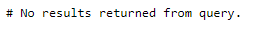  

## Pancreas Sample Analysis from SRP090175
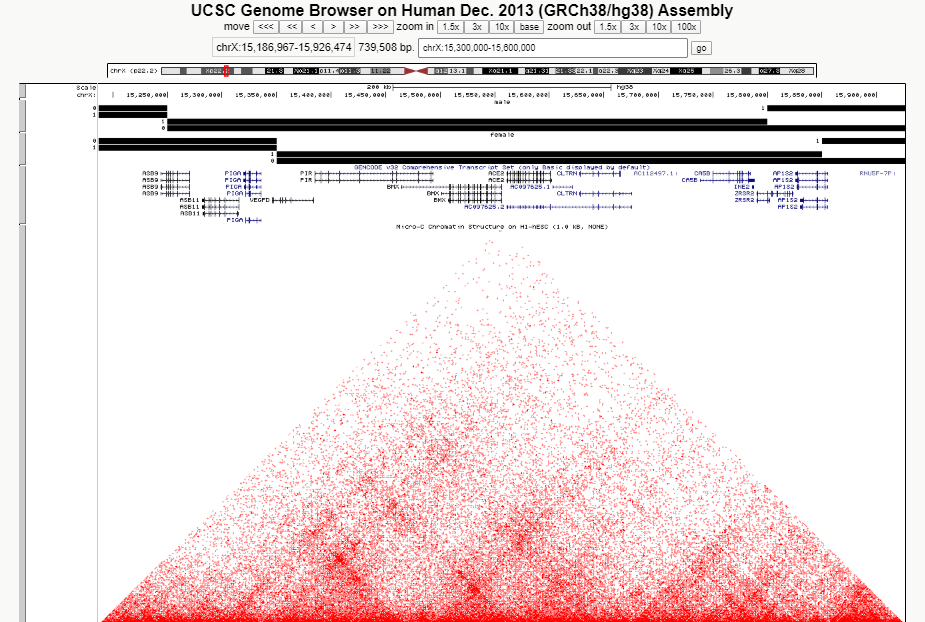  
**Female TAD:** chrX:15,346,192-15,853,636 ± 50kb (chrX:15,296,192-15,903,636)  
**Male TAD:** chrX:15,248,288-15,802,918 ± 50kb (chrX:15,198,288-15,852,918)  

- Sex-differential TADs are observed in pancreatic tissue. The female TAD spanning ACE2 extends more upstream of the gene, while the male TAD spanning ACE2 extends more downstream of the gene.

### Results from intersection:
**Unique to female:** There are various (278) TFBSs that are unique to females.  
**Unique to male:** There are various (239) TFBS that are unique to males. 


In [11]:
import sys
sys.path
import pandas as pd
df = pd.read_excel(r'C:\Users\bkirs\Documents\Wasserman\ACE2\unique_TFs_female_lungs.xlsx')
print (df)

      #name #unique
0     IKZF1   IKZF1
1      ATF7    ATF7
2     TBX21   TBX21
3     FOXA2   FOXA2
4     FOXA1   FOXA1
...     ...     ...
5143   MAFK     NaN
5144   ATF4     NaN
5145  CEBPB     NaN
5146    FOS     NaN
5147   SPI1     NaN

[5148 rows x 2 columns]


### Accessing Saved BED Files on Windows:
- Use Ubuntu:  
**cd /mnt/c/Users/bkirs/Documents/Wasserman**  
**less *NAME_OF_FILE.bed***  
- To intersect the TADs with the ACE2 gene, save the genomic position of the gene in a BED file using Table Browser and use the bedtools *intersect* functionality:  
**bedtools intersect -a ACE2_GENE -b tads-hg38.50kb_LUNGF.bed**  

*More on bedtools: https://bedtools.readthedocs.io/en/latest/content/tools/genomecov.html*  